In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import collections
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
from grid_method import *
from model import GHH

# 1st architecture
![1st_arch](./001.png)

In [3]:
def arch_1(d, k, l):
    ghh1 = GHH(d,1,k)
    res = ghh1(d)
    
    for i in range(l-1):
        ghh = GHH(d,1,k)
        res = res.clone()
        res = ghh(res)
        
    output = res.clone()
    return output

# 2nd architecture
![2nd_arch](./002.png)

In [4]:
def arch_2(d, k, l):
    ghh1 = GHH(d,2,k)
    res = ghh1(d)
    
    for i in range(l-1):
        ghh = GHH(res,1,k)
        res = res.clone()
        res = ghh(res)
        
    output = res.clone()
    return output

# 3rd architecture
![3rd_arch](./003.png)

In [5]:
def arch_3(d, k, l):
    # start with l = 2
    ghh01 = GHH(d, 1, k)
    ghh02 = GHH(d, 1, k)
    res1 = ghh01(d)
    res2 = ghh02(d)
    res = torch.cat((res1, res2), 1)
    
    for i in range(l-2):
        ghh1 = GHH(res, 2, k)
        ghh2 = GHH(res, 2, k)
        res1 = res.clone()
        res2 = res.clone()
        res1 = ghh1(res1)
        res2 = ghh2(res2)
        res = torch.cat((res1, res2), 1)
        
    ghh_f = GHH(res, 2, k)
    res = res.clone()
    output = ghh_f(res)
    return output

# 4th architecture
![4th_arch](./004.png)

In [3]:
def arch_4(d, k, l):
    ghh01 = GHH(d, 2, k)
    ghh02 = GHH(d, 2, k)
    res1 = ghh01(d)
    res2 = ghh02(d)
    res = torch.cat((res1, res2), 1)
    
    for i in range(l-2):
        ghh1 = GHH(res, 2, k)
        ghh2 = GHH(res, 2, k)
        res1 = res.clone()
        res2 = res.clone()
        res1 = ghh1(res1)
        res2 = ghh2(res2)
        res = torch.cat((res1, res2), 1)
        
    ghh_f = GHH(res, 2, k)
    res = res.clone()
    output = ghh_f(res)
    return output

# Lipschitz constant

In [8]:
def Lipschitz_1(ls, n_iter, window_size, nb, save_name):
    lips = torch.empty(len(ls), n_iter)
    for j in range(len(ls)):
        l = ls[j]
        stats = torch.empty(n_iter)
        
        for i in range(n_iter):
            d = torch.linspace(-1*window_size, window_size, nb)
            d = d.reshape(-1, 1)
            d.requires_grad_(True)
            output = arch_1(d,3,l)
            output.backward(torch.ones_like(output))
            grad = d.grad.reshape(-1)
            
            stats[i] = grad.abs().max()
            
        lips[j,:] = stats
        print(f'{l}, finished.')
    lips_save = lips.numpy()
    np.save(save_name, lips_save)
    return lips

In [9]:
n_iter = 10000
window_size = 40
nb = 8001
ls = np.arange(21)[1:]
ls

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [39]:
lips_1 = Lipschitz_1(ls, n_iter, window_size, nb, 'W11/data/lips_1.npy')

1, finished.
2, finished.
3, finished.
4, finished.
5, finished.
6, finished.
7, finished.
8, finished.
9, finished.
10, finished.
11, finished.
12, finished.
13, finished.
14, finished.
15, finished.
16, finished.
17, finished.
18, finished.
19, finished.
20, finished.


In [34]:
n_iter = 10000
window_size = 40
nb = 8001
ls_add = np.arange(20,51,5)[1:]
ls_add

array([25, 30, 35, 40, 45, 50])

In [35]:
lips_1_add = Lipschitz_1(ls_add, n_iter, window_size, nb, 'W11/data/lips_1_add.npy')

25, finished.
30, finished.
35, finished.
40, finished.
45, finished.
50, finished.


In [126]:
lips_1 = np.load('W11/data/lips_1.npy')

In [127]:
lips_1_add = np.load('W11/data/lips_1_add.npy')

In [128]:
lips_1 = np.concatenate((lips_1, lips_1_add), axis = 0)

In [131]:
ls = np.arange(21)[1:]

In [130]:
ls_add = np.arange(20,51,5)[1:]

In [132]:
ls = np.concatenate((ls, ls_add))
ls

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 25, 30, 35, 40, 45, 50])

(26,)

In [134]:
lips_1_mean = lips_1.mean(axis = 1)
lips_1_std = lips_1.std(axis = 1)
lips_1_mean

array([1.36826622e+00, 1.48327422e+00, 1.45189095e+00, 1.39197671e+00,
       1.31552517e+00, 1.15879250e+00, 1.04792678e+00, 9.50791240e-01,
       8.17311287e-01, 7.33937502e-01, 6.01020694e-01, 4.86100435e-01,
       4.95244235e-01, 3.12527448e-01, 2.93939024e-01, 2.31663913e-01,
       2.02084929e-01, 1.97092891e-01, 1.28782645e-01, 1.30282670e-01,
       8.59295800e-02, 1.44006135e-02, 2.43172655e-03, 1.21770834e-03,
       1.83423050e-04, 2.38345616e-04], dtype=float32)

In [135]:
lips_1_std

array([0.52881056, 0.99132437, 1.4024696 , 1.7819735 , 2.1332903 ,
       2.2893286 , 2.4061852 , 2.6333477 , 2.7554145 , 3.2800891 ,
       3.5550349 , 3.6725862 , 3.7722971 , 1.8949615 , 1.907327  ,
       1.8398567 , 1.6433042 , 2.611557  , 1.1582137 , 1.633934  ,
       3.2039185 , 0.56050885, 0.03356776, 0.04522586, 0.00711222,
       0.01572649], dtype=float32)

In [136]:
lips_1_upp = lips_1_mean + lips_1_std
lips_1_low = lips_1_mean - lips_1_std

In [137]:
lips_1_max = lips_1.max(axis = 1)
lips_1_min = lips_1.min(axis = 1)

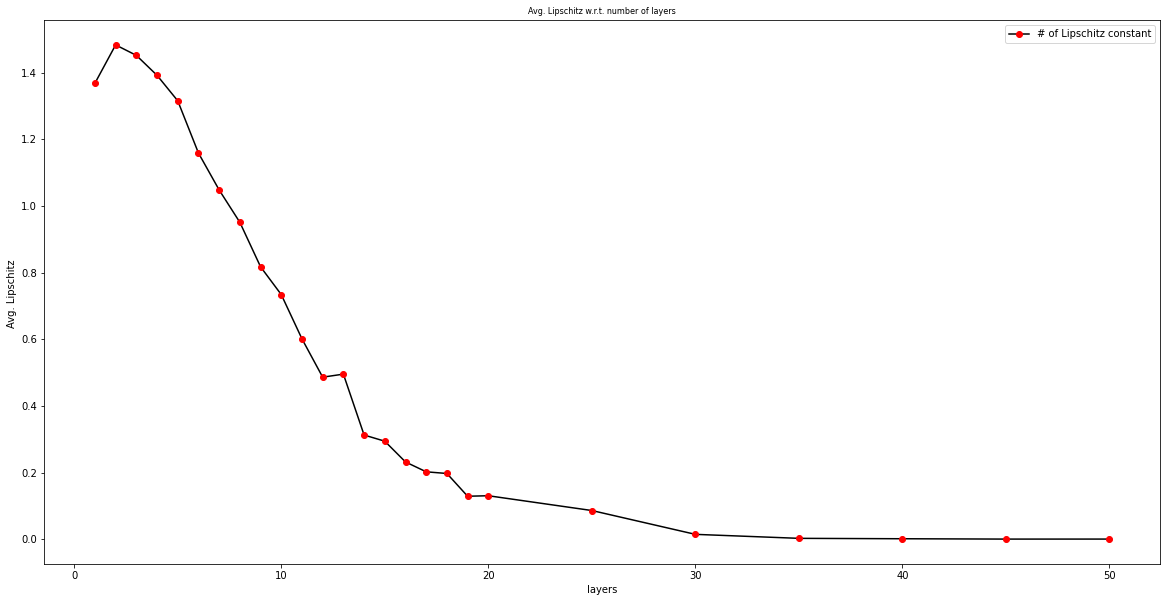

In [138]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls,lips_1_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

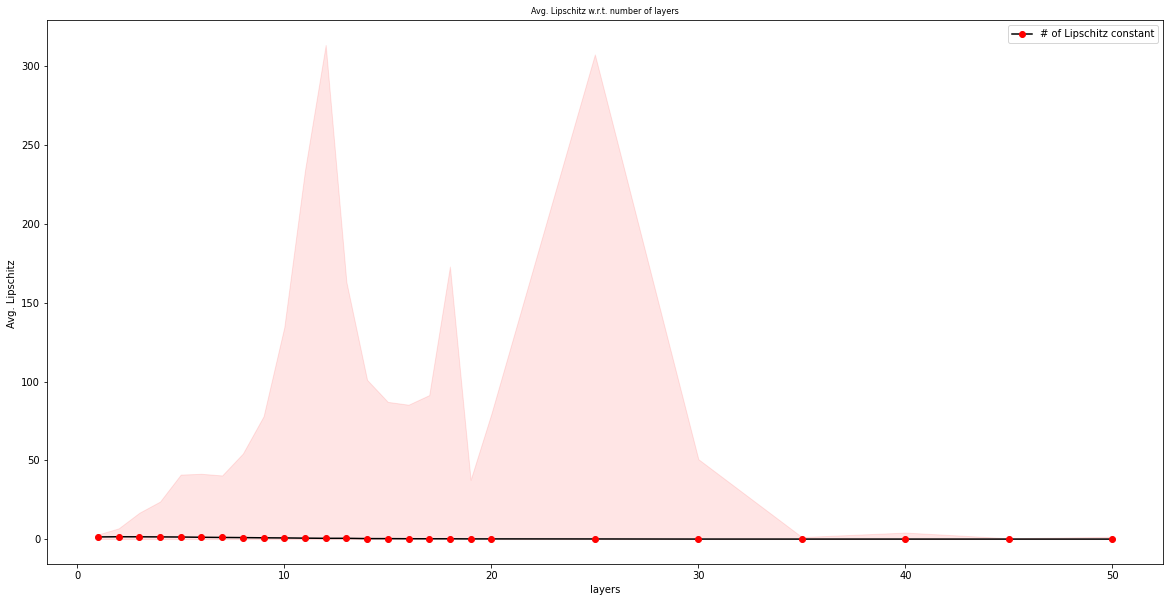

In [139]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls,lips_1_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.fill_between(ls, lips_1_max, lips_1_min, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

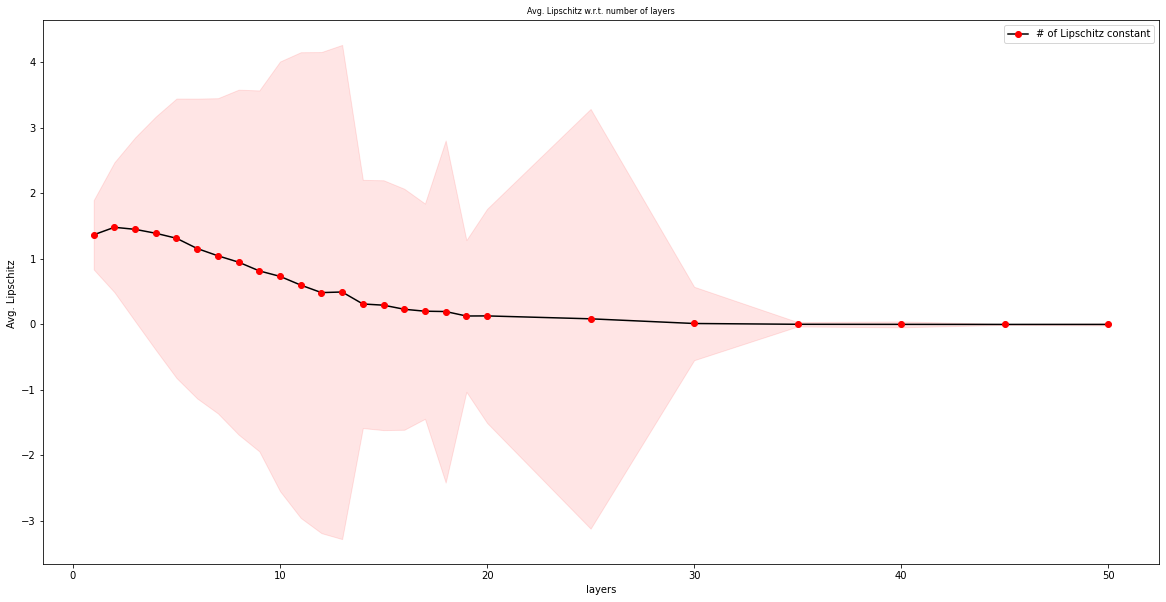

In [140]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls,lips_1_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.fill_between(ls, lips_1_upp, lips_1_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

In [99]:
def Lipschitz_2(ls, n_iter, x_range, y_range, stepsize, save_name):
    lips = torch.empty(len(ls), n_iter)
    for j in range(len(ls)):
        l = ls[j]
        stats = torch.empty(n_iter)
        
        for i in range(n_iter):
            d, length = generate_grid(x_range, y_range, stepsize)
            d.requires_grad_(True)
            output = arch_2(d,3,l)
            output.backward(torch.ones_like(output))
            grad = d.grad
            # use the 2-norm of the gradient
            stats[i] = grad.pow(2).sum(axis=1).max()
            
        lips[j,:] = stats
        print(f'{l}, finished.')
    lips_save = lips.numpy()
    np.save(save_name, lips_save)
    return lips

In [105]:
ls = np.arange(0,21,2)[1:]
ls_add = np.arange(20,51,5)[1:]
ls = np.concatenate((ls, ls_add))
n_iter = 1000
x_range = [-20, 20]
y_range = [-20, 20]
stepsize = 0.05
ls

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50])

In [107]:
lips_2 = Lipschitz_2(ls, n_iter, x_range, y_range, stepsize, 'W11/data/lips_2.npy')

2, finished.
4, finished.
6, finished.
8, finished.
10, finished.
12, finished.
14, finished.
16, finished.
18, finished.
20, finished.
25, finished.
30, finished.
35, finished.
40, finished.
45, finished.
50, finished.


In [20]:
lips_2 = np.load('W11/data/lips_2.npy')

In [21]:
lips_2_mean = lips_2.mean(axis = 1)
lips_2_std = lips_2.std(axis = 1)
lips_2_mean

array([8.5272036e+00, 1.5801630e+01, 2.4681656e+01, 1.8483639e+01,
       3.4520447e+01, 2.0590160e+01, 1.5898164e+01, 8.3774208e+01,
       4.9208660e+01, 9.9214687e+00, 1.5696101e+00, 9.9894986e-02,
       3.9302758e-03, 3.0683263e-03, 2.8113020e-04, 1.9777152e-03],
      dtype=float32)

In [22]:
lips_2_std

array([8.56019115e+00, 4.84694786e+01, 1.42410080e+02, 1.11848724e+02,
       4.41981415e+02, 1.87363937e+02, 2.08728439e+02, 2.41896680e+03,
       1.27189697e+03, 2.41570221e+02, 3.01180763e+01, 2.38229775e+00,
       1.07201874e-01, 9.48767811e-02, 8.85141827e-03, 6.25088736e-02],
      dtype=float32)

In [116]:
lips_2_upp = lips_2_mean + lips_2_std
lips_2_low = lips_2_mean - lips_2_std

lips_2_max = lips_2.max(axis = 1)
lips_2_min = lips_2.min(axis = 1)

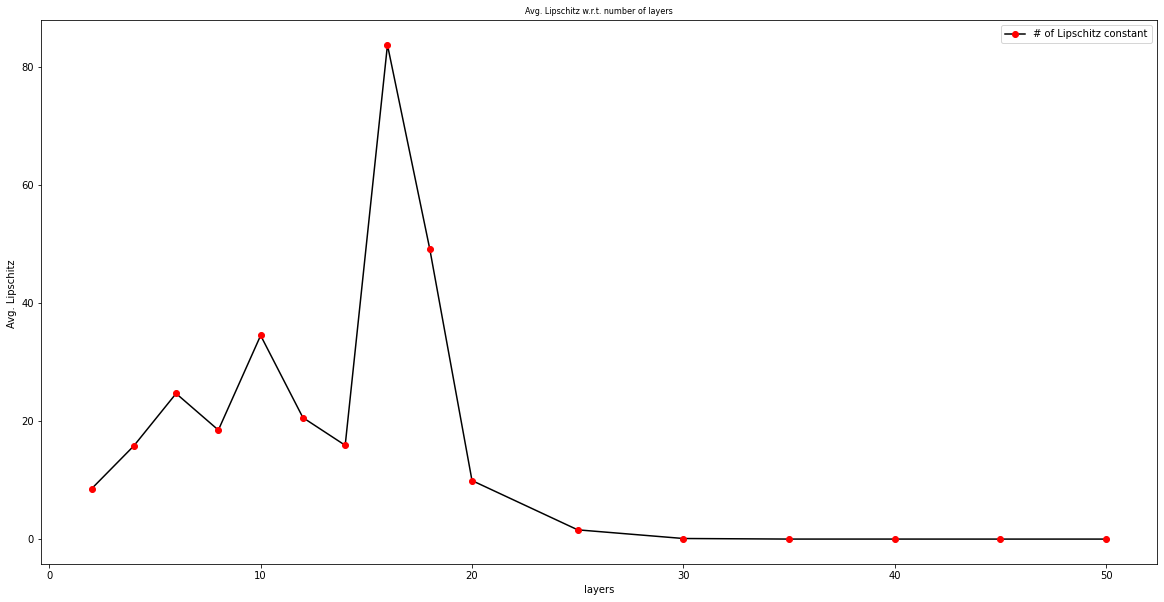

In [117]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls,lips_2_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

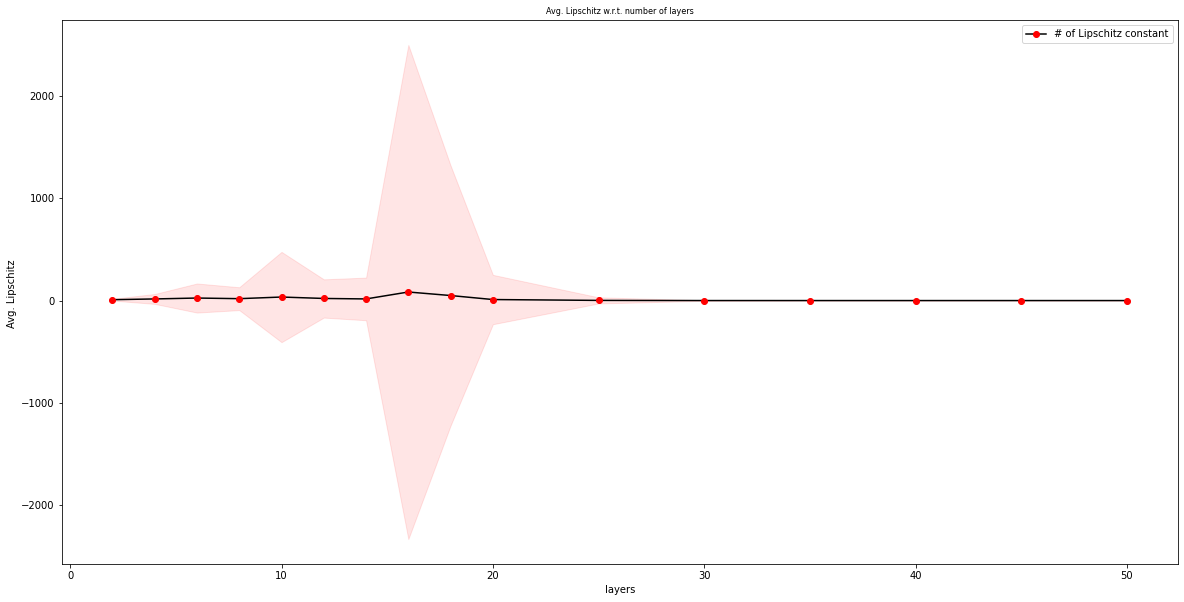

In [118]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls,lips_2_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.fill_between(ls, lips_2_upp, lips_2_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

In [142]:
def Lipschitz_3(ls, n_iter, window_size, nb, save_name1, save_name2):
    lips = torch.empty(len(ls), n_iter)
    grads = torch.empty(len(ls), n_iter, nb)
    
    for j in range(len(ls)):
        l = ls[j]
        stats = torch.empty(n_iter)
        
        for i in range(n_iter):
            d = torch.linspace(-1*window_size, window_size, nb)
            d = d.reshape(-1, 1)
            d.requires_grad_(True)
            output = arch_3(d,3,l)
            output.backward(torch.ones_like(output))
            grad = d.grad.reshape(-1)
            grads[j,i] = grad
            stats[i] = grad.abs().max()
            
        lips[j,:] = stats
        print(f'{l}, finished.')
    lips_save = lips.numpy()
    np.save(save_name1, lips_save)
    grads_save = grads.numpy()
    np.save(save_name2, grads_save)
    return stats

In [148]:
ls = np.arange(0,21,2)[1:]
ls_add = np.arange(20,51,5)[1:]
ls = np.concatenate((ls, ls_add))
n_iter = 1000
x_range = [-20, 20]
y_range = [-20, 20]
stepsize = 0.05
ls

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50])

array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50])

##### test

In [191]:
ls = [1, 2]

In [192]:
n_iter = 2
window_size = 40
nb = 8001

In [193]:
lips_3 = Lipschitz_3(ls, n_iter, window_size, nb, 'W11/test.npy', 'W11/test2.npy')

1, finished.
2, finished.


In [194]:
test2 = np.load('W11/test2.npy')

### Lipschitz for archi3

In [25]:
ls_3 = np.concatenate((np.array([1]),np.arange(0,21,2)[1:]))
ls_add = np.arange(20,51,5)[1:]
ls_3 = np.concatenate((ls_3, ls_add))
ls_3

array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50])

In [204]:
n_iter = 2000
window_size = 40
nb = 8001

In [205]:
lips_3 = Lipschitz_3(ls_3, n_iter, window_size, nb, 'W11/data/lips_3.npy', 'W11/data/grad_3.npy')

1, finished.
2, finished.
4, finished.
6, finished.
8, finished.
10, finished.
12, finished.
14, finished.
16, finished.
18, finished.
20, finished.
25, finished.
30, finished.
35, finished.
40, finished.
45, finished.
50, finished.


In [211]:
lips_3.mean(axis = 1)

array([2.4642432e+00, 2.4684153e+00, 5.8309383e+00, 1.2410951e+01,
       2.6240948e+01, 4.8880405e+01, 9.6119675e+01, 2.0340356e+02,
       4.6754449e+02, 7.6820947e+02, 1.7878770e+03, 6.9273560e+03,
       4.6082199e+04, 1.6225383e+05, 7.5008788e+05, 8.4783050e+06,
       3.0148170e+07], dtype=float32)

In [5]:
lips_3 = np.load('W11/data/lips_3.npy')
grads_3 = np.load('W11/data/grad_3.npy')

lips_3_mean = lips_3.mean(axis = 1)
lips_3_std = lips_3.std(axis = 1)

lips_3_upp = lips_3_mean + lips_3_std
lips_3_low = lips_3_mean - lips_3_std

lips_3_max = lips_3.max(axis = 1)
lips_3_min = lips_3.min(axis = 1)

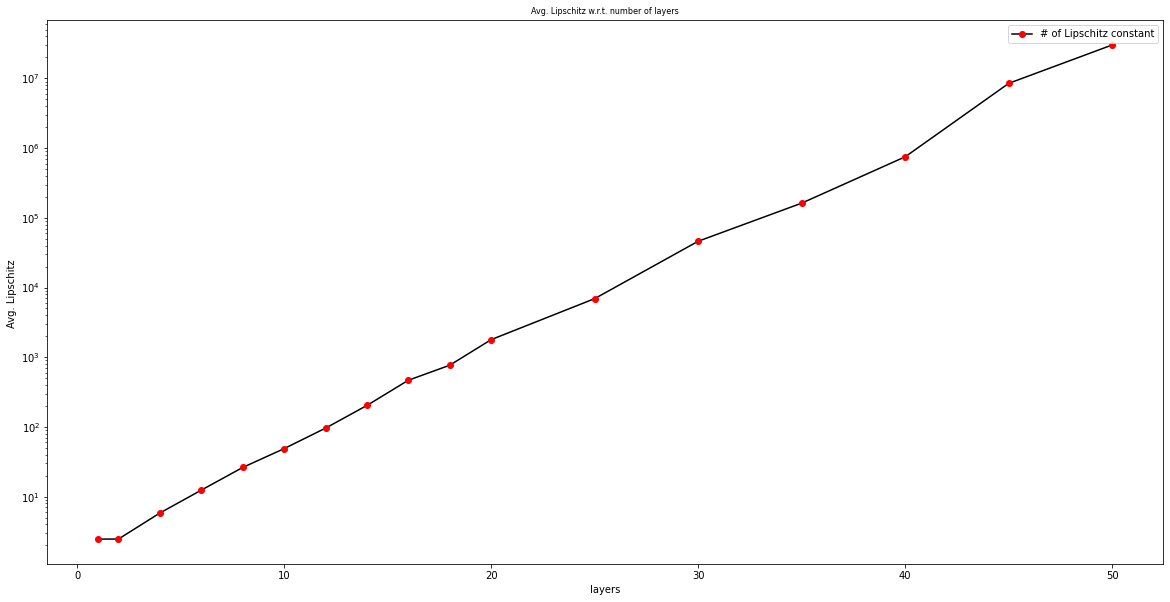

In [27]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls_3,lips_3_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.yscale('log')
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

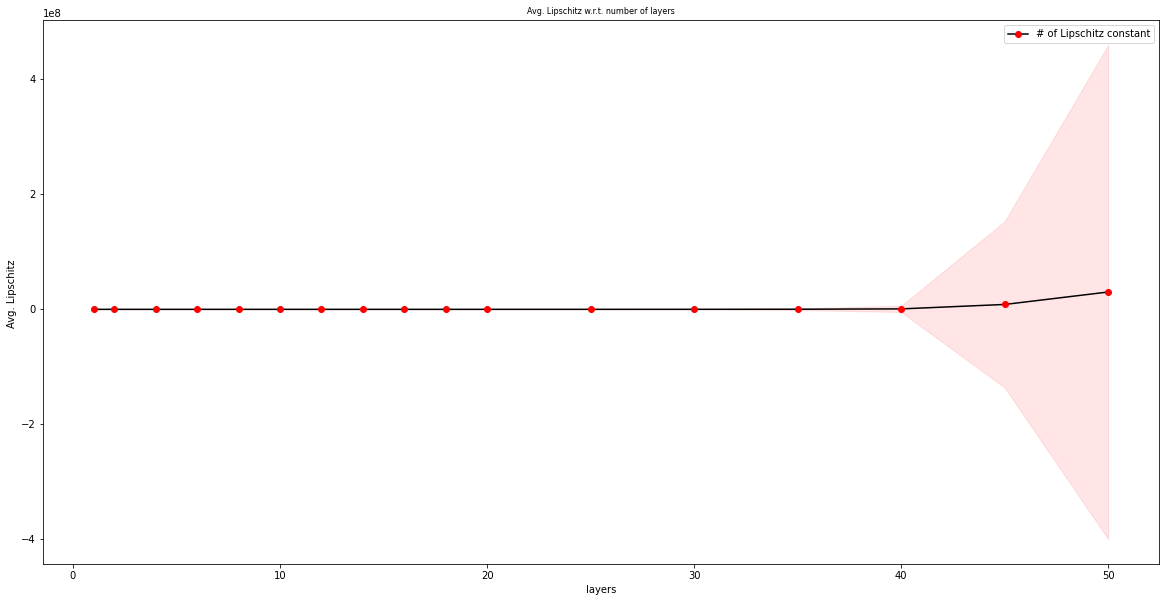

In [212]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls_3,lips_3_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.fill_between(ls_3, lips_3_upp, lips_3_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

In [31]:
ls_3

array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50])

Text(0.5, 1.0, 'distribution of the gradient')

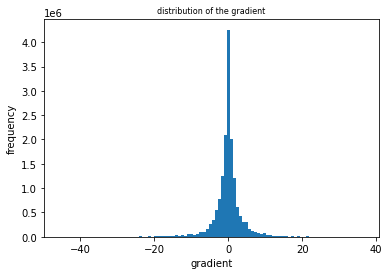

In [6]:
# to plot the histogram of gradient
plt.hist(grads_3[2].ravel(), bins = 100)

plt.xlabel("gradient")
plt.ylabel("frequency")
plt.title("distribution of the gradient",fontsize=8)

Text(0.5, 1.0, 'distribution of the gradient')

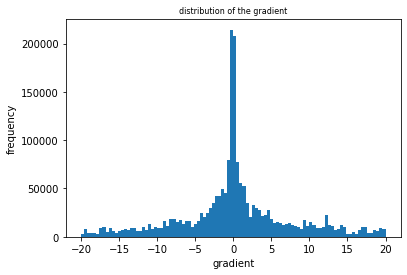

In [7]:
# to plot the histogram of gradient
test = grads_3[16].ravel()
plt.hist(test[np.abs(test)<20], bins = 100)

plt.xlabel("gradient")
plt.ylabel("frequency")
plt.title("distribution of the gradient",fontsize=8)

In [8]:
test[np.abs(test)<20].shape[0]/test.shape[0]

0.12418503937007874

In [9]:
test[np.abs(test)<200].shape[0]/test.shape[0]

0.2528891388576428

In [10]:
test[np.abs(test)<2000].shape[0]/test.shape[0]

0.4293783277090364

In [11]:
test[np.abs(test)<20000].shape[0]/test.shape[0]

0.6164281964754406

In [12]:
test[np.abs(test)<200000].shape[0]/test.shape[0]

0.7959311961004875

In [29]:
test = grads_3[16].ravel()
x_values = np.concatenate((np.logspace(0, 7,7, endpoint=False), np.linspace(10000000, np.abs(test).max(), 5)), axis = 0)

y_values = np.empty((len(x_value)))
for i in range(len(x_values)):
    x_value = x_values[i]
    y_values[i] = test[np.abs(test)<x_value].shape[0]/test.shape[0]

In [30]:
y_values

array([0.03909693, 0.09942682, 0.20632402, 0.37287577, 0.56082127,
       0.74641564, 0.88316604, 0.96283671, 0.99975134, 0.99975453,
       0.99975859, 0.999987  ])

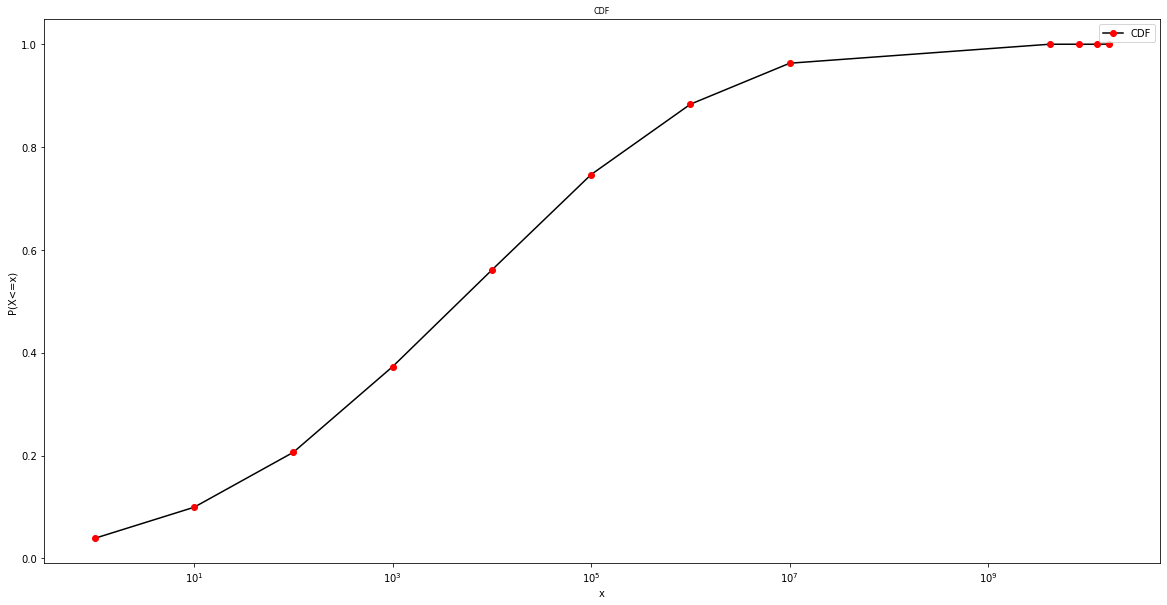

In [32]:
fig = plt.figure(figsize=(20,10))


plt.plot(x_values,y_values, 'k-',marker = 'o',mfc = 'r', mec = 'r', label = 'CDF')
plt.xscale('log')
plt.legend()

plt.xlabel("x")
plt.ylabel("P(X<=x)")
plt.title("CDF",fontsize=8)


plt.show()

In [13]:
np.abs(test).max()

16584832000.0

In [11]:
def Lipschitz_4(ls, n_iter, x_range, y_range, stepsize, nb, save_name1, save_name2):
    lips = torch.empty(len(ls), n_iter)
    grads = torch.empty(len(ls), n_iter, nb)
    for j in range(len(ls)):
        l = ls[j]
        stats = torch.empty(n_iter)
        
        for i in range(n_iter):
            d, length = generate_grid(x_range, y_range, stepsize)
            d.requires_grad_(True)
            output = arch_4(d,3,l)
            output.backward(torch.ones_like(output))
            grad = d.grad
            norm = grad.pow(2).sum(axis=1).reshape(-1)
            grads[j,i] = norm
            # use the 2-norm of the gradient
            stats[i] =norm.max()
            
        lips[j,:] = stats
        print(f'{l}, finished.')
    lips_save = lips.numpy()
    np.save(save_name1, lips_save)
    grads_save = grads.numpy()
    np.save(save_name2, grads_save)
    return lips

### testing

In [216]:
lips_4 = Lipschitz_4(ls, n_iter, x_range, y_range, stepsize, 'W11/data/lips_4.npy')

TypeError: Lipschitz_4() missing 2 required positional arguments: 'save_name1' and 'save_name2'

In [89]:
lips_4

tensor([[37.3506, 53.9507,  1.0388,  2.7448, 14.1972],
        [17.9545,  3.6003, 20.3613, 45.8299, 61.7090],
        [24.4453, 41.0557, 29.8450, 39.8368, 32.2712]])

In [169]:
d, length = generate_grid([-40, 40], [-40, 40], 0.05)
d.requires_grad_(True)
output = arch_4(d,3,2)
output.backward(torch.ones_like(output))
grad = d.grad

In [170]:
grad.shape

torch.Size([2563201, 2])

In [172]:
1601*1601

2563201

In [187]:
ls = [1,2]
n_iter = 2
x_range = [-20, 20]
y_range = [-20, 20]
stepsize = 0.05
nb = 801*801

In [188]:
test = Lipschitz_4(ls, n_iter, x_range, y_range, stepsize, nb, 'W11/data/test.npy')

1, finished.
2, finished.


### Lipschitz for archi4

In [28]:
ls = np.arange(0,21,2)[1:]
ls_add = np.arange(20,51,5)[1:]
ls = np.concatenate(([1],ls, ls_add))
n_iter = 1000
x_range = [-20, 20]
y_range = [-20, 20]
stepsize = 0.1
nb = 401*401
ls_4 = ls
ls_4

array([ 1,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50])

In [13]:
lips_4 = Lipschitz_4(ls_4, n_iter, x_range, y_range, stepsize, nb, 'W11/data/lips_4.npy', 'W11/data/grads_4.npy')

1, finished.
2, finished.
4, finished.
6, finished.
8, finished.
10, finished.
12, finished.
14, finished.
16, finished.
18, finished.
20, finished.
25, finished.
30, finished.
35, finished.
40, finished.
45, finished.
50, finished.


In [15]:
lips_4 = np.load('W11/data/lips_4.npy')
grads_4 = np.load('W11/data/grads_4.npy')

lips_4_mean = lips_4.mean(axis = 1)
lips_4_std = lips_4.std(axis = 1)

lips_4_upp = lips_4_mean + lips_4_std
lips_4_low = lips_4_mean - lips_4_std

lips_4_max = lips_4.max(axis = 1)
lips_4_min = lips_4.min(axis = 1)

D:\Anaconda3\envs\work\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [29]:
lips_4_std

array([1.4938206e+01, 1.4794008e+01, 2.6382520e+02, 3.0193899e+03,
       2.0092029e+04, 3.4105650e+05, 1.8737048e+06, 7.4266050e+06,
       2.1928006e+08, 2.4601435e+08, 3.5218301e+10, 6.8878700e+09,
       6.1395252e+12, 4.2747028e+14, 1.3926673e+17,           inf,
                 inf], dtype=float32)

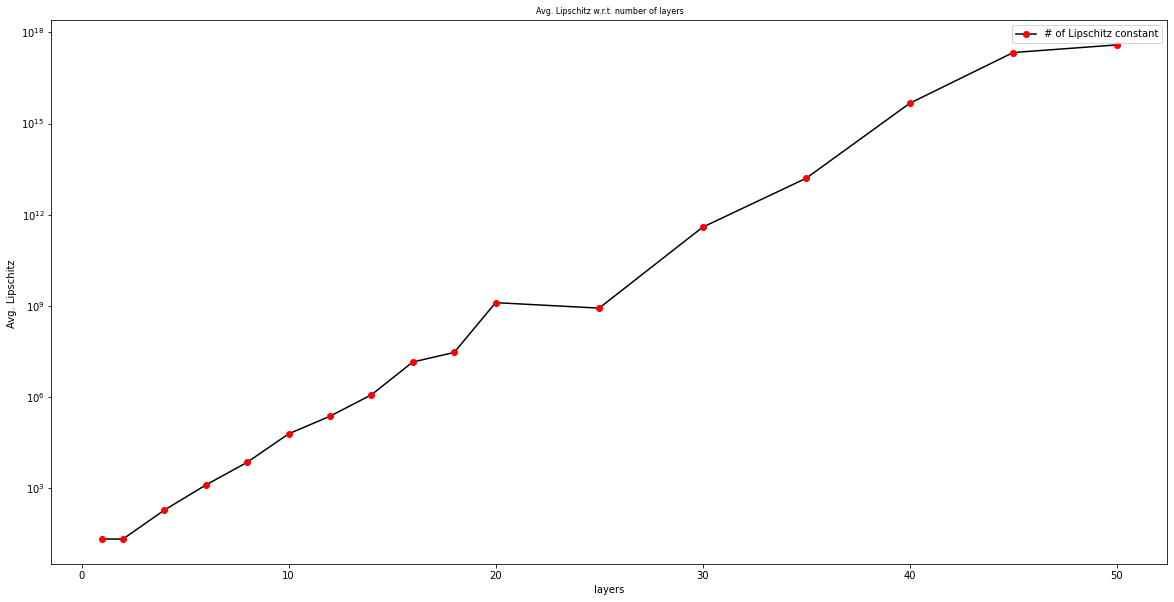

In [30]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls_4,lips_4_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.yscale('log')
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

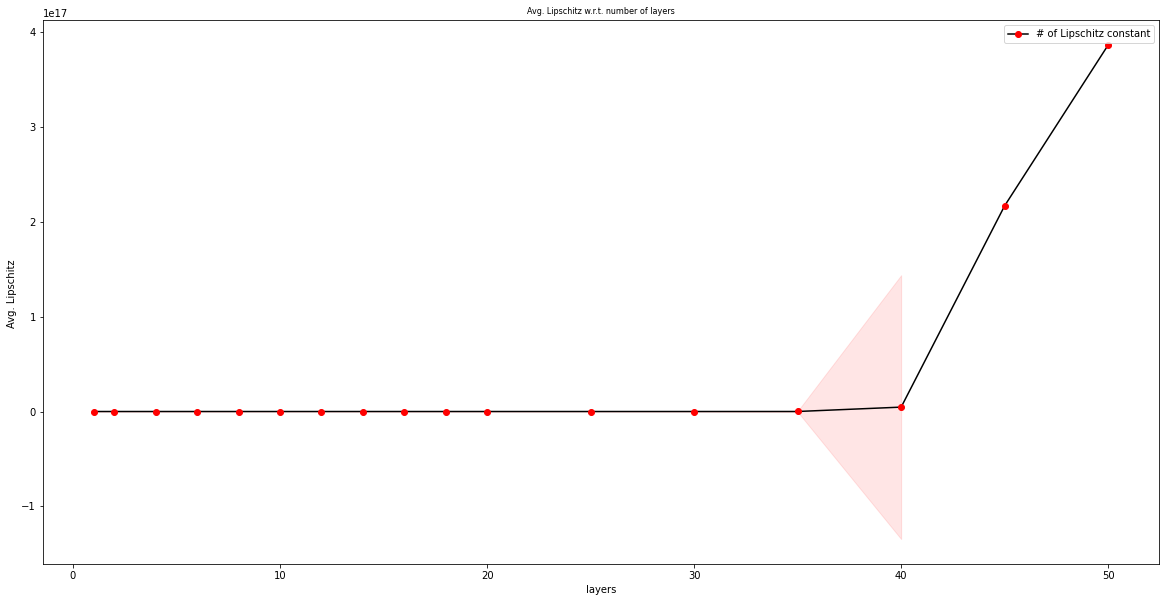

In [17]:
# plotting
fig = plt.figure(figsize=(20,10))


plt.plot(ls_4,lips_4_mean,'k-',marker = 'o',mfc = 'r', mec = 'r', label = '# of Lipschitz constant')
plt.fill_between(ls_4, lips_4_upp, lips_4_low, color='red', alpha = 0.1)
plt.legend()

plt.xlabel("layers")
plt.ylabel("Avg. Lipschitz ")
plt.title("Avg. Lipschitz w.r.t. number of layers",fontsize=8)

plt.show()

In [8]:
x = torch.empty(20,1000,401*401,2)

Text(0.5, 1.0, 'distribution of the gradient')

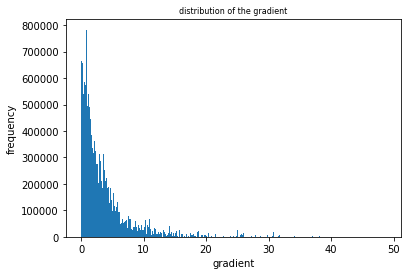

In [47]:
# to plot the histogram of gradient
grads_4_test = np.sqrt(grads_4)
plt.hist(grads_4_test[2].ravel(), bins = 'auto')

plt.xlabel("gradient")
plt.ylabel("frequency")
plt.title("distribution of the gradient",fontsize=8)